# IMPORT

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем модули для работы с датой и временем
from datetime import datetime
from datetime import timedelta

# Загружаем модуль для работы с регулярными выражениями
import re

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

import requests 
from bs4 import BeautifulSoup

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

RANDOM_SEED = 42
!pip freeze > requirements.txt

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

# DATA

In [3]:
df_train.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [4]:
"""Посмотрим на пропуски и на то, какие данные могут быть категориальными"""
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [5]:
df_test.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [7]:
# Для того, чтобы обработать признаки в обеих частях (и в тренировочной и тестовой) объединяем эти части в один датасет
df_train['sample'] = 1 # помечаем трейн
df_test['sample'] = 0 # помечаем нас тест
df_test['Rating'] = 0 # заполняем нулями рейтинг в тестовой части, где его пока нет
data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [8]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

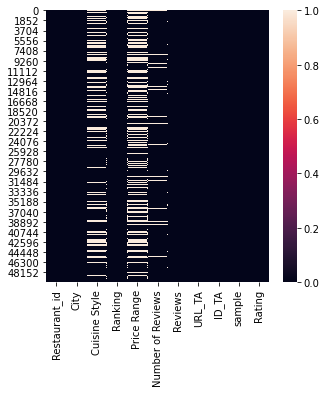

In [9]:
"""Посмотрим на пропуски в данных"""
plt.figure(figsize = (5,5))
sns.heatmap(data = data.isnull())

In [10]:
print(data.Reviews[5], type(data.Reviews[5]))
print(data['Cuisine Style'][5], type(data['Cuisine Style'][5]))
#данные грязные, например ревью и типы кухни спарсили списком, но по формату данные строковые

[['Lunch Break', 'Good to Quick Bite'], ['09/07/2017', '09/02/2017']] <class 'str'>
['French', 'Cafe', 'Fast Food'] <class 'str'>


# DATA CLEANING AND PREPARATION

In [11]:
"""Заполним пустые значения количества ревью нулями, но создадим отдельный признак, говорящий о пустом значении ревью."""
data['rev_isna'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Number of Reviews'].fillna(0, inplace=True)

In [12]:
"""Ещё раз посмотрим на признаки"""
data.nunique(dropna = False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
rev_isna                 2
dtype: int64

#### Обработаем значения City
Признак - город можно разбить на dummy переменные, а так же перевести в число ресторанов в городе и в дальнейшем использовать это как признак, или нормировать Ranking относительно количества городов и использовать составной.

In [13]:
"""Создадим новый признак - количество заведений, представленных в датасете в городе"""
cities = data.City.value_counts()
data['nCity'] = data.apply(lambda x: cities[x.City], axis = 1)

data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rev_isna,nCity
45043,id_1381,Prague,"['Thai', 'Vietnamese']",1382.0,$,7.0,"[['Best asian food in town!', 'Finally tried i...",/Restaurant_Review-g274707-d12248558-Reviews-L...,d12248558,1,4.5,0,1816
29388,id_4331,Madrid,"['American', 'Spanish', 'Asian']",4333.0,NaN,61.0,"[[], []]",/Restaurant_Review-g187514-d7809594-Reviews-La...,d7809594,1,3.5,0,3813
20147,id_627,Vienna,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",628.0,$$ - $$$,91.0,"[['Tasty big pizza!', 'Really tasty pizza'], [...",/Restaurant_Review-g190454-d10386740-Reviews-R...,d10386740,1,4.0,0,1443
12281,id_10570,Paris,"['French', 'Bar', 'European']",10572.0,$$ - $$$,71.0,[['Good Neighborhood Venue - Stick to the Bas....,/Restaurant_Review-g187147-d3484940-Reviews-Le...,d3484940,1,3.0,0,6108
24471,id_7679,Madrid,NaN,7686.0,NaN,44.0,"[['Long queue', 'Rubbish Queue Organisation'],...",/Restaurant_Review-g187514-d1022048-Reviews-Te...,d1022048,1,3.0,0,3813


In [14]:
data['dCity'] = data['City']
data = pd.get_dummies(data, columns=[ 'dCity'])

#### Обработаем значения Price Range
Они могут быть расположены в порядке возрастания или убывания, значит, строго говоря, не являются категориальными и могут быть заменены на числа 1,2,3

In [15]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [16]:
data['price_isna'] = pd.isna(data['Price Range']).astype('uint8') #создадим признак отсутствия ценового диапазона
data['Price Range'] = data.apply(lambda x: x['Price Range'].replace('$$ - $$$', '2').replace('$$$$', '3').replace('$', '1')
                                 if type(x['Price Range']) == str else 0,axis = 1)
data['Price Range'] = data.apply(lambda x: float(x['Price Range']), axis = 1)

In [17]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,dCity_Oporto,dCity_Oslo,dCity_Paris,dCity_Prague,dCity_Rome,dCity_Stockholm,dCity_Vienna,dCity_Warsaw,dCity_Zurich,price_isna
39876,id_3489,London,"['Bar', 'European', 'British', 'Vegetarian Fri...",3496.0,2.0,861.0,"[['Good mmmm may be okay', 'Christmas Party'],...",/Restaurant_Review-g186338-d2482431-Reviews-Br...,d2482431,1,...,0,0,0,0,0,0,0,0,0,0
47144,id_5374,Rome,NaN,5376.0,0.0,35.0,"[['Excellent place to chill', 'Cool bar in the...",/Restaurant_Review-g187791-d4794288-Reviews-Li...,d4794288,1,...,0,0,0,0,1,0,0,0,0,1
35359,id_2042,Prague,"['Asian', 'Thai', 'Vietnamese']",2045.0,0.0,2.0,"[['Great fresh food', 'My favourite vietnamese...",/Restaurant_Review-g274707-d8618237-Reviews-Vi...,d8618237,1,...,0,0,0,1,0,0,0,0,0,1
49062,id_297,Barcelona,"['American', 'Bar', 'Vegetarian Friendly', 'Ve...",298.0,2.0,691.0,"[['A sportive evening with beer...', 'Not at a...",/Restaurant_Review-g187497-d11622184-Reviews-N...,d11622184,1,...,0,0,0,0,0,0,0,0,0,0
43123,id_6185,Madrid,"['Mediterranean', 'Bar', 'Spanish', 'European']",6188.0,2.0,119.0,"[['Scenic view with tasty plates 🍴', 'Be caref...",/Restaurant_Review-g187514-d7058072-Reviews-Le...,d7058072,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
"""Определим несколько полезных функций для работы с датами публикации ревью"""
def d_time (cell): #функция которая возвращает разницу по времени в днях между двумя последними ревью
    try:
        x = cell.split(',')[2:]
        x = pd.Series(x).apply(lambda x: x.replace('[','').replace(']','').replace("'",'').replace(' ',''))
        x = x.apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))
        delta_x=x[1]-x[0]
        return abs(delta_x.days)
    except:
        return -1 # чтобы значения NaN не мешали и выделялись кардинально 
def fresh_date (cell): #Функция, которая вычисляет дату самого свежего отображенного отзыва для каждого ресторана"""
    try:
        x = cell.split(',')[2:]
        x = pd.Series(x).apply(lambda x: x.replace('[','').replace(']','').replace("'",'').replace(' ',''))
        x = x.apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))
        fresh_x = max(x[0],x[1])
        return fresh_x
    except:
        return None

In [19]:
"""Создадим синтетический признак на основании даты самого свежего отзыва о ресторане"""
data['rev_date'] = data.apply(lambda x: fresh_date(x['Reviews']), axis = 1)
data['rev_date'] = data['rev_date'].apply(lambda x: (x - datetime.now()).days)
data['rev_date'].fillna(data['rev_date'].mean(), inplace = True)
data['rev_date'] = (data['rev_date'] - data['rev_date'].mean())
data['rev_date'] = data['rev_date'] / np.linalg.norm(data['rev_date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


#### Обработаем признак Cuisine Style и разберём его на Dummy-переменные

In [20]:
"""Создадим признак для ресторанов где тип кухни не упомянут"""
data['cuisine_isna'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [21]:
"""Очистим строки от всего лишнего, включая пробелы и оставим только разделители-запятые"""
data['Cuisine Style'] = data.apply(lambda x: x['Cuisine Style'].replace('[','').replace(']','').replace("'",'').replace(' ','') 
                                   if type(x['Cuisine Style']) != float else x['Cuisine Style'], axis = 1)

"""Разберем признак который представлен строкой, на дамми-переменные по разделителю"""
styles = data['Cuisine Style'].str.get_dummies(',').sum().sort_values(ascending = False)
styles_drop = [x for x in styles.index if styles[x] < 1000] # изначально ограничимся только признаками которые имеют больше 1000 ресторанов

"""Присоединим получившийся датафрейм новых признаков """
data = data.join(data['Cuisine Style'].str.get_dummies(',').drop(styles_drop, axis = 1), how = 'left')


Напишем функцию-филлер, которая дозаполнит пропуски в признаках Cuisine Styles на основании Review.

In [22]:
data.VegetarianFriendly.value_counts() #для проверки посчитаем количество вегетарианских заведений до обработки

0    35979
1    14021
Name: VegetarianFriendly, dtype: int64

In [23]:
pattern = re.compile('[A-Z][a-z]*') #регулярное выражение которое вытащит из признаков теги
def fill_styles (row):
    for style in styles.drop(styles_drop).index:
        x = pattern.match(style)[0]
        try:
            if x.lower() in row.Reviews.lower(): #ищем теги в отзывах
                row[style] = 1
        except:
            continue
    return row

In [24]:
data = data.apply(lambda x: fill_styles(x),axis = 1)

In [25]:
data.VegetarianFriendly.value_counts() # и после

0    35918
1    14082
Name: VegetarianFriendly, dtype: int64

# EDA

In [26]:
df_train = data[data['sample'] == 1]

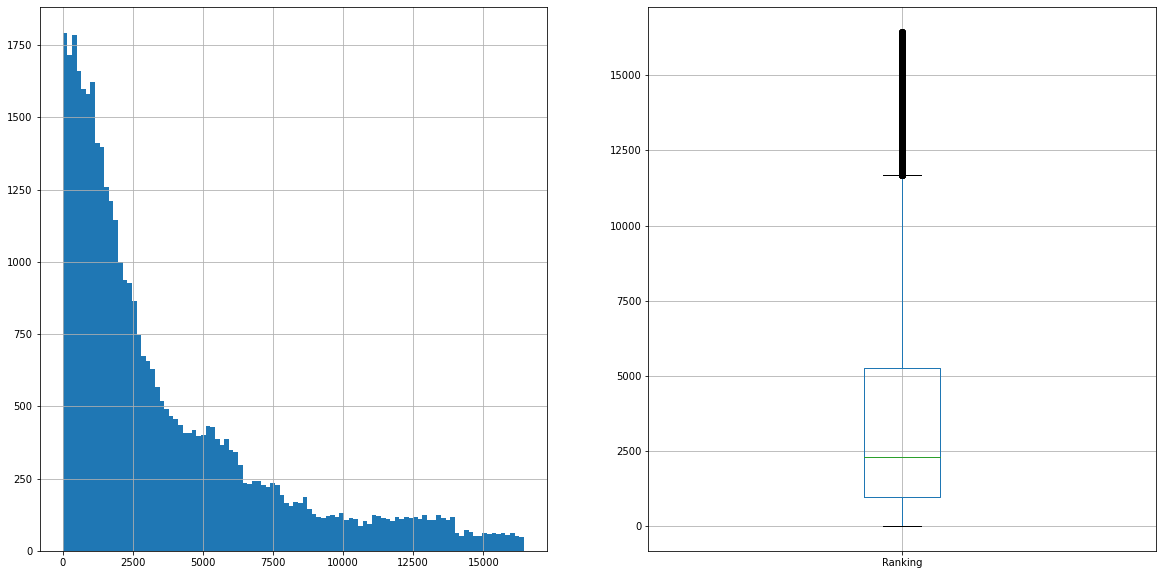

In [27]:
"""Распределение признака ranking"""
fig, axes = plt.subplots(1, 2, figsize=(20, 10));
df_train['Ranking'].hist(bins=100, ax=axes[0])
df_train.boxplot(column='Ranking', ax=axes[1])

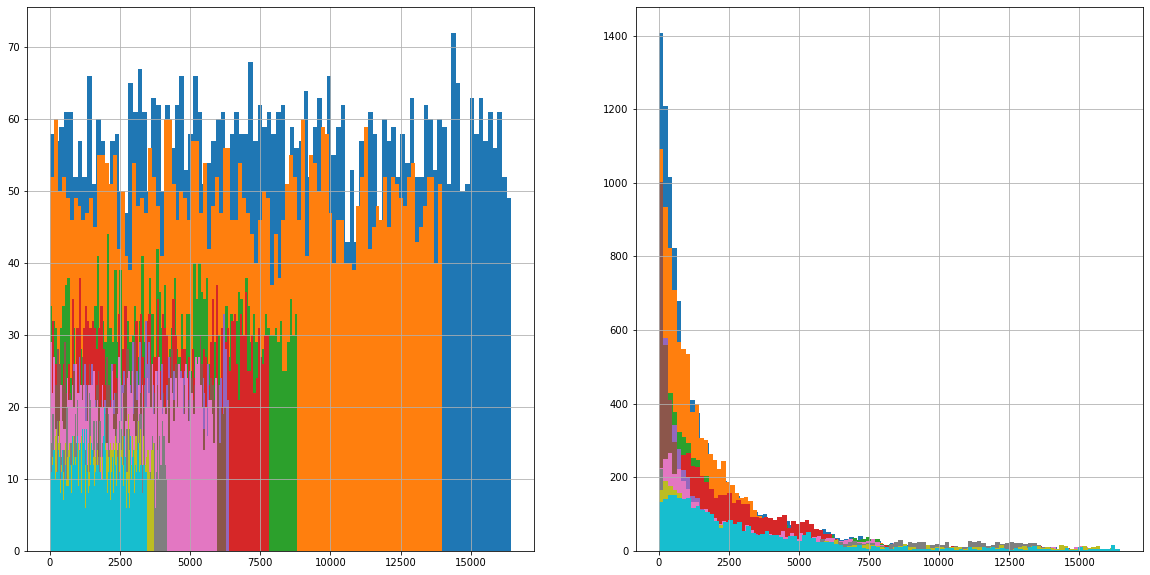

In [28]:
"Посмотрим на распределение признака Ranking по городам (слева) и типам кухонь (справа)"
fig, axes = plt.subplots(1, 2, figsize=(20, 10));
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100, ax = axes[0])
for x in styles[0:10].index:
    df_train[df_train[x] == 1]['Ranking'].hist(bins = 100, ax = axes[1])
plt.show()

Мы видим,что по городам признак ranking распределен нормально, а по видам кухонь экспоненциально.

#### Посмотрим на матрицу корелляции

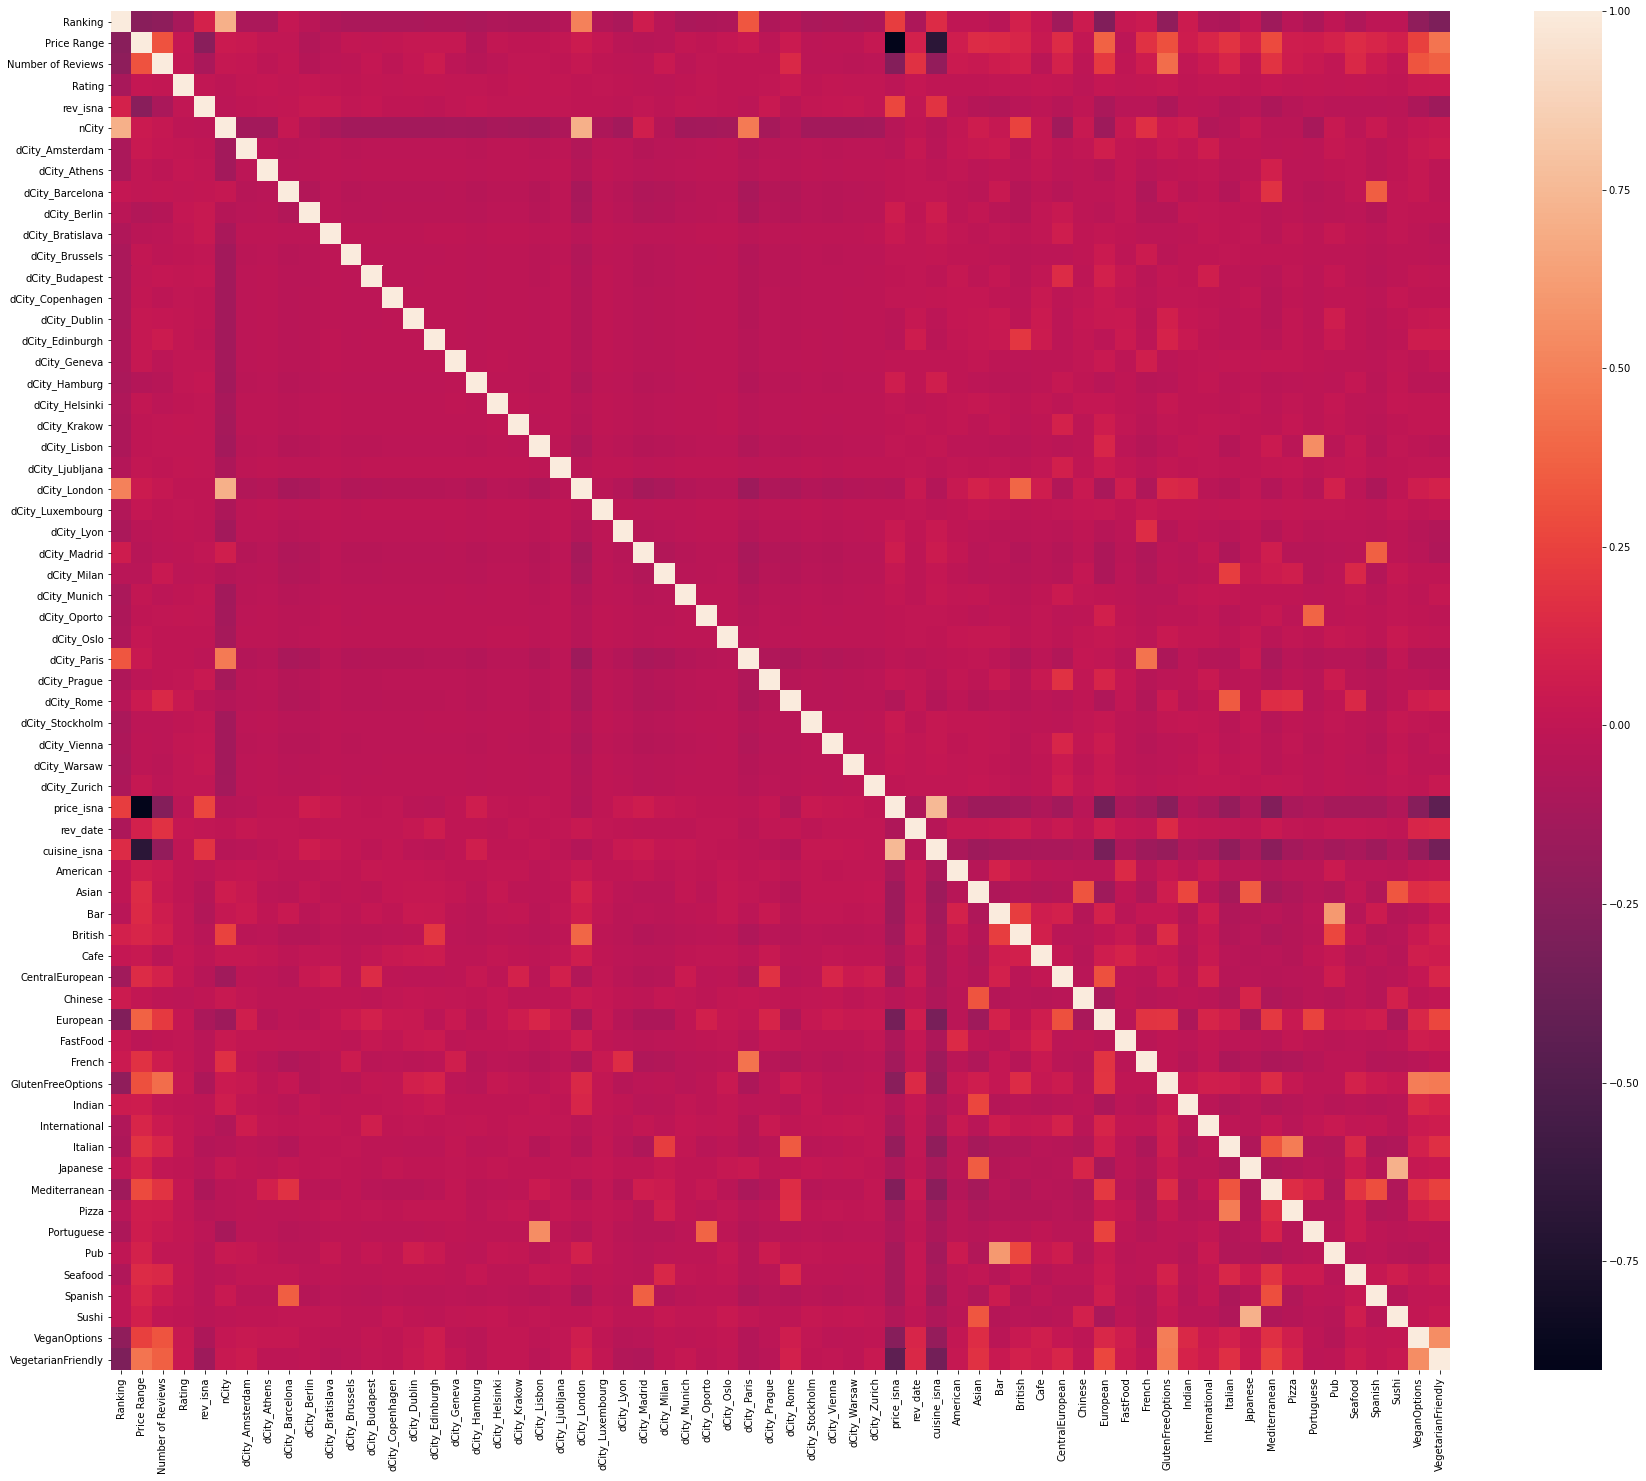

In [29]:
c_mat = data.drop(['sample'], axis=1).corr()
plt.rcParams['figure.figsize'] = (30,25)
sns.heatmap(c_mat)

In [30]:
print('Ранг матрицы - {}, det(c_mat) = {}'.format(np.linalg.matrix_rank(c_mat), np.linalg.det(c_mat)))
c_mat.shape

Ранг матрицы - 64, det(c_mat) = -6.306900091191525e-30


(64, 64)

Ранг матрицы корелляций максимальный, но определитель близок к нулю, матрица плохо обусловлена, признаки мультиколлинеарны.
Мы видим, что сильно скореллированы признаки Ranking и nCity, price_isna и cuisine_isna, Bar и Pub, Japanese и Sushi
Можем их попарно объединить, первую пару поделить друг на друга, а остальные логически сложить (ИЛИ)
Price Range и price_isna закономерно имеют высокую обратную корелляцию, что очевидно, так как один образован из другого.

In [31]:
"""Нормализуем признак Ranking относительно количества заведений в городе"""
data['nRanking'] = data.Ranking / data.nCity
data.drop(['Ranking','nCity'], axis = 1, inplace = True)

In [32]:
"""Объединим бары и пабы, японскую кухню и суши"""
data['Bar_Pub'] = data.Bar | data.Pub
data.drop(['Bar','Pub'], axis = 1, inplace = True)

data['Japan_Sushi'] = data.Japanese | data.Sushi
data.drop(['Japanese','Sushi'], axis = 1, inplace = True)

In [33]:
"""Объединим признаки об отсутствии ценового диапазона и кухни в один признак data_missing"""
data['data_missing'] = data.cuisine_isna | data.price_isna
data.drop(['cuisine_isna','price_isna'], axis = 1, inplace = True)

In [34]:
#ещё раз взглянув на матрицу корелляции, можно увидеть, что признак data_missing высоко обратно скореллирован с Price Range (-0.9)
c_mat = data.drop(['sample'], axis=1).corr()
print(c_mat['Price Range'].data_missing)
#можно избавиться от data_missing
data.drop(['data_missing'], axis = 1, inplace = True)

-0.9027056933753346


In [35]:
c_mat = data.drop(['sample'], axis=1).corr() #проверим насколько поменялось значение определителя матрицы
print('Ранг матрицы - {}, det(c_mat) = {}'.format(np.linalg.matrix_rank(c_mat), np.linalg.det(c_mat)))
c_mat.shape

Ранг матрицы - 59, det(c_mat) = 4.632079340017886e-16


(59, 59)

# Data Preprocessing
Завернем предобработку в одну функцию

In [36]:
#импортируем все заново
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # трейн
df_test['sample'] = 0 # тест
df_test['Rating'] = 0 # таргет

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [37]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    """Заполним пустые значения количества ревью нулями, но создадим отдельный признак, говорящий о пустом значении ревью."""
    df_output['rev_isna'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Number of Reviews'].fillna(0, inplace=True)
    
    
    # ################### 3. Encoding ##############################################################
    """Создадим dummy-признаки на основании городов"""
    df_output['dCity'] = df_output.City
    df_output = pd.get_dummies(df_output, columns=['dCity'], dummy_na=True)
    
    df_output['Price Range'] = df_output.apply(lambda x: x['Price Range'].replace('$$ - $$$', '2').replace('$$$$', '3').replace('$', '1')
                                 if type(x['Price Range']) == str else 0,axis = 1)
    df_output['Price Range'] = df_output.apply(lambda x: float(x['Price Range']), axis = 1)
    
    """Очистим строку со стилями кухни от лишних символов"""
    df_output['Cuisine Style'] = df_output.apply(lambda x: x['Cuisine Style'].replace('[','').replace(']','').replace("'",'').replace(' ','') 
                                   if type(x['Cuisine Style']) != float else x['Cuisine Style'], axis = 1)

    """Разберем признак который представлен строкой, на дамми-переменные по разделителю"""
    styles = df_output['Cuisine Style'].str.get_dummies(',').sum().sort_values(ascending = False)
    styles_drop = [x for x in styles.index if styles[x] < 100] # ограничимся только признаками которые имеют больше 100 ресторанов

    """Присоединим получившийся датафрейм новых признаков """
    df_output = df_output.join(df_output['Cuisine Style'].str.get_dummies(',').drop(styles_drop, axis = 1), how = 'left')
    
    """Дозаполним получившиеся dummy-признаки на основании ревью"""
    df_output = df_output.apply(lambda x: fill_styles(x),axis = 1)
    
    
    # ################### 4. Feature Engineering ####################################################
    """Новый признак - количество заведений в городе"""
    cities = df_output.City.value_counts()
    df_output['nCity'] = df_output.apply(lambda x: cities[x.City], axis = 1)
    
    """Нормализуем признак Ranking относительно количества заведений в городе"""
    df_output['nRanking'] = df_output.Ranking / df_output.nCity
    df_output.drop(['Ranking','nCity'], axis = 1, inplace = True)
    
    """Объединим бары и пабы, японскую кухню и суши"""
    df_output['Bar_Pub'] = df_output.Bar | df_output.Pub
    df_output.drop(['Bar','Pub'], axis = 1, inplace = True)

    df_output['Japan_Sushi'] = df_output.Japanese | df_output.Sushi
    df_output.drop(['Japanese','Sushi'], axis = 1, inplace = True)
    
    """Создадим синтетический признак на основании даты самого свежего отзыва о ресторане"""
    df_output['rev_date'] = df_output.apply(lambda x: fresh_date(x['Reviews']), axis = 1)
    df_output['rev_date'] = df_output['rev_date'].apply(lambda x: (x - datetime.now()).days)
    df_output['rev_date'].fillna(df_output['rev_date'].mean(), inplace = True)
    df_output['rev_date'] = df_output['rev_date'] - df_output['rev_date'].mean()
    df_output['rev_date'] = df_output['rev_date'] / np.linalg.norm(df_output['rev_date'])
    
    
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

# ML

In [38]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Price Range,Number of Reviews,sample,Rating,rev_isna,dCity_Amsterdam,dCity_Athens,dCity_Barcelona,dCity_Berlin,dCity_Bratislava,...,Thai,Turkish,VeganOptions,VegetarianFriendly,Vietnamese,WineBar,nRanking,Bar_Pub,Japan_Sushi,rev_date
1445,1.0,23.0,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.683947,0,0,3.490853e-15
9817,0.0,7.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.301411,0,0,3.490853e-15
15378,0.0,24.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1.842137,0,0,3.490853e-15
49366,2.0,31.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0.536344,0,0,3.490853e-15
18829,3.0,848.0,1,4.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0.037983,0,0,3.490853e-15
33032,2.0,109.0,1,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1.074984,1,0,3.490853e-15
24277,1.0,222.0,1,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0.903860,0,0,3.490853e-15
75,2.0,158.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.437370,1,0,3.490853e-15
30040,2.0,208.0,1,4.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0.208134,1,0,3.490853e-15
8504,3.0,2.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.566423,0,0,3.490853e-15


In [39]:
"""Ещё раз посмотрим на все признаки, убедимся что нет пропусков"""
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 110 entries, Price Range to rev_date
dtypes: float64(5), int64(105)
memory usage: 42.0 MB


In [40]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # таргет
X = train_data.drop(['Rating'], axis=1)

In [41]:
# разобьем данные, выделим 20% на валидацию
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape # проверим

((10000, 109), (40000, 109), (40000, 108), (32000, 108), (8000, 108))

# ML

In [42]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [43]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)
y_pred = (y_pred * 2).round() / 2

In [44]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Cчитаем Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.17575


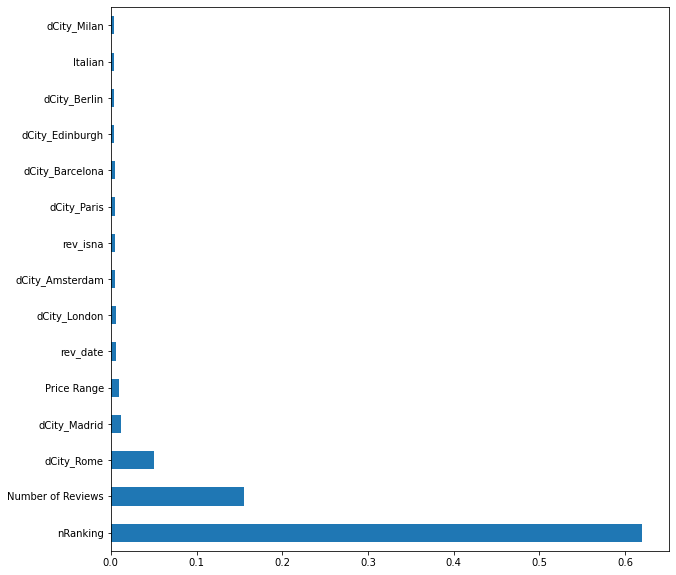

In [45]:
# Посмотрим на важность фич
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [46]:
test_data.sample(10)

,Price Range,Number of Reviews,Rating,rev_isna,dCity_Amsterdam,dCity_Athens,dCity_Barcelona,dCity_Berlin,dCity_Bratislava,dCity_Brussels,...,Thai,Turkish,VeganOptions,VegetarianFriendly,Vietnamese,WineBar,nRanking,Bar_Pub,Japan_Sushi,rev_date
2560,1.0,7.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.920923,0,1,3.490853e-15
9966,2.0,35.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.661816,0,0,-6.144467e-03
5098,0.0,44.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.625222,0,0,3.490853e-15
4235,0.0,42.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.303206,0,0,3.490853e-15
8867,0.0,8.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.265542,0,1,3.490853e-15
8469,2.0,790.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.121282,0,0,3.490853e-15
7260,2.0,481.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.090090,1,0,3.490853e-15
3685,3.0,163.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.536748,0,0,3.490853e-15
6040,2.0,422.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.895925,1,0,7.559362e-03
6942,2.0,286.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.558276,0,0,3.490853e-15


In [47]:
test_data = test_data.drop(['Rating'], axis=1)

In [48]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [49]:
predict_submission = regr.predict(test_data)
predict_submission = (predict_submission * 2).round() / 2

In [50]:
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4.5])

In [51]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,3.0
7,id_7,1.0
8,id_8,4.0
9,id_9,4.5
